In [1]:
%matplotlib inline

from astropy.io import fits
from astropy.table import Table
from glob import glob
import astropy.units as u
import astropy.constants as co
import astropy.cosmology as cosm
import numpy as np
import pandas as pd
import os

from os.path import expanduser

import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap

In [2]:
plt.style.use('ggplot')

# Note: For calculation of most of the values used in this notebook, see my previous notebook [insert name here idk i'll look it up later].

In [3]:
# grabbing table:

home = expanduser('~')
path = os.path.join(home,'Dropbox','**','CGM2*.csv')
filepath = glob(path, recursive=True)
gal_info = pd.read_csv(filepath[0], index_col=[0])

In [4]:
# renaming some columns:

gal_info.rename(columns={'OBJECT_x': 'OBJECT'}, inplace=True)
gal_info.rename(columns={'specfile_x': 'specfile'}, inplace=True)
gal_info.rename(columns={'gal_ra_x': 'gal_ra'}, inplace=True)
gal_info.rename(columns={'gal_dec_x': 'gal_dec'}, inplace=True)

In [5]:
# making functions to create BPT diagram lines:

def galline(logN2):
    y = (0.61/logN2-0.05)+1.3
    return(y)
def QSOline(logN2):
    y = 0.61/(logN2-0.47)+1.19
    return(y)

In [6]:
# Creating arrays of x and y values for lines for use in first (N2 on x-axis) BPT plot:


# Arrays for galaxy/intermediate separating line
BPTgallinex = np.arange(-2,0,0.1)
BPTgalline = galline(BPTgallinex)


# Arrays for intermediate/QSO separator
BPTqsolinex = np.arange(-2,0.5,0.1)
BPTqsoline = QSOline(BPTqsolinex)

/Users/reformedfolloweroftheichorgodbel-shamharoth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


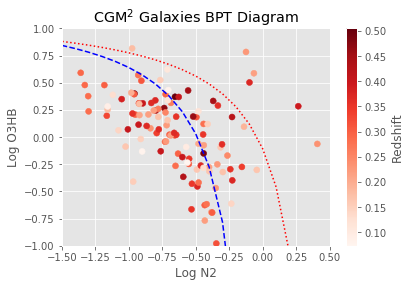

In [7]:
# Let's plot!
plt.scatter(np.log10(gal_info['N2']), np.log10(gal_info['O3HB']), c=gal_info['z'], cmap='Reds')
plt.plot(BPTgallinex,BPTgalline, c='b', linestyle='--')
plt.plot(BPTqsolinex,BPTqsoline, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Redshift')
plt.xlabel('Log N2')
plt.ylabel('Log O3HB')
plt.xlim(-1.5,0.5)
plt.ylim(-1,1)
plt.title('CGM$^2$ Galaxies BPT Diagram');
plt.savefig('./py_files/BPTdiagramz.png');

In [8]:
# making these into variables on their own just so their names are a bit shorter
log_N2 = np.log10(gal_info['N2'])
log_O3HB = np.log10(gal_info['O3HB'])

# for determining what region a given galaxy lies in on the N2 BPT plot
galdiff = log_O3HB-galline(log_N2)
QSOdiff = log_O3HB-QSOline(log_N2)

/Users/reformedfolloweroftheichorgodbel-shamharoth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/reformedfolloweroftheichorgodbel-shamharoth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# New ratio for the x-axis of a new BPT plot, being given a shorter name as the N2 boys above
S2 = np.log10(gal_info.SIIa_flux/gal_info.Halpha_flux)
gal_info['S2'] = S2

/Users/reformedfolloweroftheichorgodbel-shamharoth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [10]:
# here's some new columns for gal_info (main array):

gal_info['logN2'] = np.log10(gal_info['N2'])
gal_info['logO3HB'] = np.log10(gal_info['O3HB'])
gal_info['galdiff'] = log_O3HB-galline(log_N2)
gal_info['QSOdiff'] = log_O3HB-QSOline(log_N2)

/Users/reformedfolloweroftheichorgodbel-shamharoth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/reformedfolloweroftheichorgodbel-shamharoth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


# Now focusing mainly on the possible/probable QSOs:

First grabbing the definite QSOs within 400 kpc:

In [11]:
qso_ind = np.ravel(
    np.where((QSOdiff > 0) & (gal_info['rho'] < 400.) & (gal_info['logN2'] > -0.9))
)
N2qsos = gal_info.loc[qso_ind]

Objects that fall in the intermediate range:

In [12]:
int_indices = np.ravel(np.where((QSOdiff < 0) & (galdiff > 0)))
maybe_qsos = gal_info.loc[int_indices]

Narrowing intermediate ones to just galaxies that are < 400 kpc of quasar (i.e. within the CGM, more or less).

In [13]:
relevant_idx = np.ravel(np.where((QSOdiff < 0) & (galdiff > 0) & (gal_info['rho']<400.)))
maybe_relevant = gal_info.loc[relevant_idx]

In [14]:
# taking this many-columned table down to a more condensed one with just the relelvant parameters:

they_might_be_seyferts = pd.DataFrame(
    [maybe_relevant.id, maybe_relevant.gal_ra, maybe_relevant.gal_dec, maybe_relevant.z, maybe_relevant.rho, maybe_relevant.mstars,
    maybe_relevant.logN2, maybe_relevant.logO3HB, maybe_relevant.galdiff, maybe_relevant.QSOdiff,
    maybe_relevant.S2]
).T
#they_might_be_seyferts.to_csv('./py_files/mAybeGN.csv')

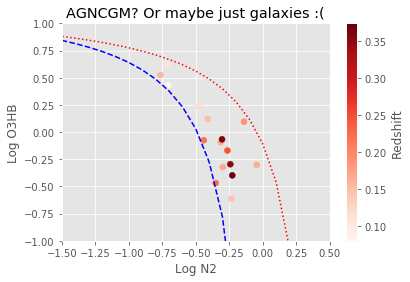

In [15]:
# plotting our newly-condensed list:

plt.scatter(they_might_be_seyferts['logN2'], they_might_be_seyferts['logO3HB'], c=they_might_be_seyferts['z'], cmap='Reds', label=they_might_be_seyferts['id'])
plt.plot(BPTgallinex,BPTgalline, c='b', linestyle='--')
plt.plot(BPTqsolinex,BPTqsoline, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Redshift')
plt.xlabel('Log N2')
plt.ylabel('Log O3HB')
plt.xlim(-1.5,0.5)
plt.ylim(-1,1)
plt.title('AGNCGM? Or maybe just galaxies :(')
plt.savefig('./py_files/mAybeGN.png');

Well that's a little weird. I wonder why it caught those couple points below the galaxy line. <-- rerun your code

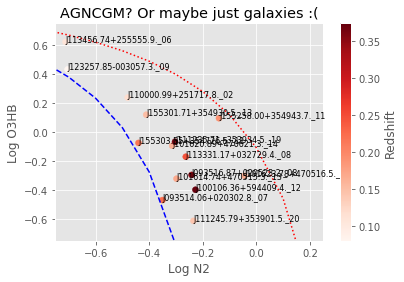

In [16]:
# now with labels!

plt.scatter(they_might_be_seyferts['logN2'], they_might_be_seyferts['logO3HB'], c=they_might_be_seyferts['z'], cmap='Reds', label=they_might_be_seyferts['id'])
for ii in range(len(they_might_be_seyferts)):
    plt.annotate(
        they_might_be_seyferts['id'].loc[they_might_be_seyferts.index[ii]], 
    (they_might_be_seyferts['logN2'].loc[they_might_be_seyferts.index[ii]], 
     they_might_be_seyferts['logO3HB'].loc[they_might_be_seyferts.index[ii]],
    ),
        fontsize=8,
)
plt.plot(BPTgallinex,BPTgalline, c='b', linestyle='--')
plt.plot(BPTqsolinex,BPTqsoline, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Redshift')
plt.xlabel('Log N2')
plt.ylabel('Log O3HB')
plt.xlim(-0.75,0.25)
plt.ylim(-0.75,0.75)
plt.title('AGNCGM? Or maybe just galaxies :(')
plt.savefig('./py_files/mAybeGN_annotated.png');

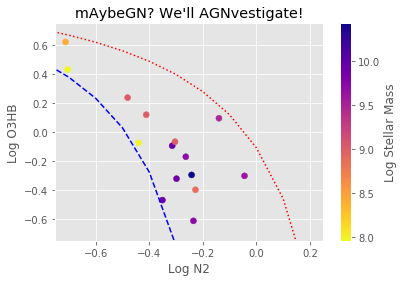

In [17]:
# now with color mapped to mass:

plt.scatter(they_might_be_seyferts['logN2'], they_might_be_seyferts['logO3HB'], c=they_might_be_seyferts['mstars'], cmap='plasma_r', label=they_might_be_seyferts['id'])
plt.plot(BPTgallinex,BPTgalline, c='b', linestyle='--')
plt.plot(BPTqsolinex,BPTqsoline, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Log Stellar Mass')
plt.xlabel('Log N2')
plt.ylabel('Log O3HB')
plt.xlim(-0.75,0.25)
plt.ylim(-0.75,0.75)
plt.title("mAybeGN? We'll AGNvestigate!")
plt.savefig('./py_files/mAybeGN_mass.png');

In [18]:
# having looked at most of the spectra, here are the three that are either likely or definitely QSOs:

theyre_probably_seyferts = maybe_relevant.loc[[286,293,681]]

# Now looking at BPT diagram w/ S2 on x-axis:

In [19]:
S2_gal_info = gal_info.query('S2 != 0')

In [20]:
# new BPT diagram, new lines to plot

# separates galaxies from AGN
def gallineS2(logS2):
    y = (0.72/(logS2-0.32))+1.3
    return(y)

# separates Seyfert AGN from LINERs
def seyfert_separate(logS2):
    y = 1.89*(logS2)+0.76
    return(y)

In [21]:
# As with the first BPT plot, x and y-value arrays:

BPT2_AGNline_x = np.arange(-2,0,0.1)
BPT2_AGNline = gallineS2(BPT2_AGNline_x)
BPT2_separator_x = np.arange(-0.32,0,0.1)
BPT2_separator = seyfert_separate(BPT2_separator_x)

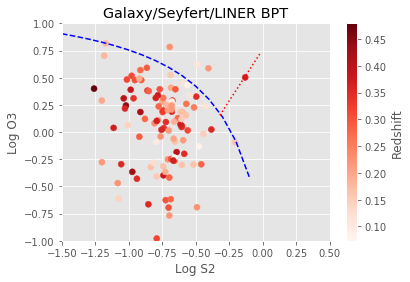

In [22]:
plt.scatter(S2_gal_info.S2, S2_gal_info.logO3HB, c=S2_gal_info['z'], cmap='Reds')
plt.plot(BPT2_AGNline_x,BPT2_AGNline, c='b', linestyle='--')
plt.plot(BPT2_separator_x,BPT2_separator, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Redshift')
plt.xlabel('Log S2')
plt.ylabel('Log O3')
plt.xlim(-1.5,0.5)
plt.ylim(-1,1)
plt.title('Galaxy/Seyfert/LINER BPT')
plt.savefig('./py_files/S2_BPT.png');

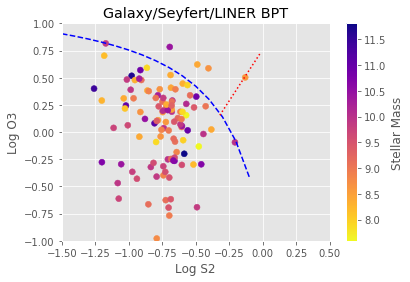

In [23]:
plt.scatter(S2_gal_info.S2, S2_gal_info.logO3HB, c=S2_gal_info['mstars'], cmap='plasma_r')
plt.plot(BPT2_AGNline_x,BPT2_AGNline, c='b', linestyle='--')
plt.plot(BPT2_separator_x,BPT2_separator, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Stellar Mass')
plt.xlabel('Log S2')
plt.ylabel('Log O3')
plt.xlim(-1.5,0.5)
plt.ylim(-1,1)
plt.title('Galaxy/Seyfert/LINER BPT');
#plt.savefig('./py_files/S2_BPT.png');

In [24]:
# Legit Seyferts (via S2 method):

# as with N2 plot lines, these are needed to check whether a galaxy is in the right region or not
QSOdiff2 = gal_info.logO3HB-gallineS2(gal_info.S2)
sepdiff = gal_info.logO3HB-seyfert_separate(gal_info.S2) # come to think of it this condition isn't even necessary in this case

# gathering up the galaxies in the Seyfert region and also filtering out the ones outside (more or less) of the CGM:
relevant_idx2 = np.ravel(np.where((QSOdiff2 > 0) & (S2 != 0) & (gal_info['rho']<400.))).tolist()
legit_seyferts = gal_info.loc[relevant_idx2]

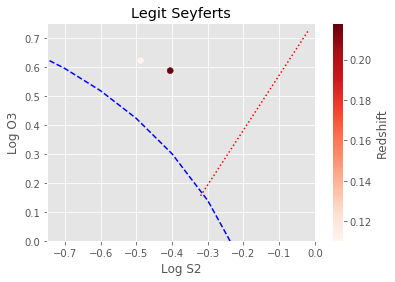

In [25]:
plt.scatter(legit_seyferts.S2, legit_seyferts.logO3HB, c=legit_seyferts['z'], cmap='Reds')
plt.plot(BPT2_AGNline_x,BPT2_AGNline, c='b', linestyle='--')
plt.plot(BPT2_separator_x,BPT2_separator, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Redshift')
plt.xlabel('Log S2')
plt.ylabel('Log O3')
plt.xlim(-0.75,0.)
plt.ylim(0.,0.75)
plt.title('Legit Seyferts');

# Comparing our two BPT results:

In [26]:
print('Seyferts based on BPT S2 diagram:')

print(legit_seyferts.id)

Seyferts based on BPT S2 diagram:
461    J113456.74+255555.9._06
707    J155307.29+354825.1._11
Name: id, dtype: object


In [27]:
print('definite AGN from BPT N2:')

print(N2qsos['id'])

definite AGN from BPT N2:
431    J113328.16+032717.6._07
707    J155307.29+354825.1._11
Name: id, dtype: object


In [28]:
print('AGN in intermediate zone from BPT N2:')

print(they_might_be_seyferts['id'].loc[[286,293,681]])

AGN in intermediate zone from BPT N2:
286    J101620.89+470621.3._14
293    J101623.78+470516.5._14
681    J155258.00+354943.7._11
Name: id, dtype: object


# I find it strange that the S2 diagram only has one overlapping AGN with the other two plots from the first one.

In [29]:
# Concatenating the three separate lists into one:

New_CGM_QSOs = pd.concat([legit_seyferts,N2qsos,theyre_probably_seyferts]).drop_duplicates().sort_index()

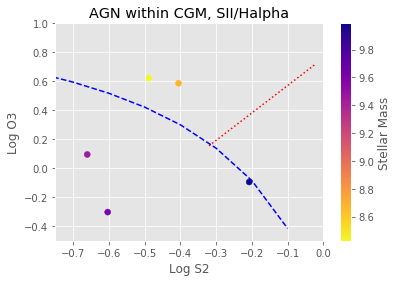

In [30]:
plt.scatter(New_CGM_QSOs.S2, New_CGM_QSOs.logO3HB, c=New_CGM_QSOs['mstars'], cmap='plasma_r')
plt.plot(BPT2_AGNline_x,BPT2_AGNline, c='b', linestyle='--')
plt.plot(BPT2_separator_x,BPT2_separator, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Stellar Mass')
plt.xlabel('Log S2')
plt.ylabel('Log O3')
plt.xlim(-0.75,0.0)
plt.ylim(-0.5,1)
plt.title('AGN within CGM, SII/Halpha');

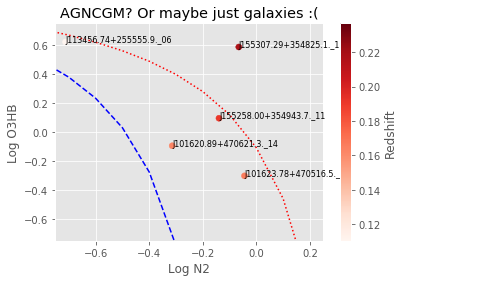

In [31]:
# now with labels!

plt.scatter(New_CGM_QSOs['logN2'], New_CGM_QSOs['logO3HB'], c=New_CGM_QSOs['z'], cmap='Reds', label=New_CGM_QSOs['id'])
for ii in range(len(New_CGM_QSOs)):
    plt.annotate(
        New_CGM_QSOs['id'].loc[New_CGM_QSOs.index[ii]], 
    (New_CGM_QSOs['logN2'].loc[New_CGM_QSOs.index[ii]], 
     New_CGM_QSOs['logO3HB'].loc[New_CGM_QSOs.index[ii]],
    ),
        fontsize=8,
)
plt.plot(BPTgallinex,BPTgalline, c='b', linestyle='--')
plt.plot(BPTqsolinex,BPTqsoline, c='r', linestyle=':')
cb=plt.colorbar()
cb.set_label('Redshift')
plt.xlabel('Log N2')
plt.ylabel('Log O3HB')
plt.xlim(-0.75,0.25)
plt.ylim(-0.75,0.75)
plt.title('AGNCGM? Or maybe just galaxies :(');
#plt.savefig('./py_files/mAybeGN_annotated.png');

In [32]:
New_CGM_QSOs

,Unnamed: 0.1,specfile,id,OBJECT,cgm_name_x,gal_ra,gal_dec,z,OII_flux,OII_flux_sig,...,R23,Z_N2,Z_N2flag,Z_R23,Z_R23flag,S2,logN2,logO3HB,galdiff,QSOdiff
286,Sam,J101620.89+470621.3.fits,J101620.89+470621.3._14,J1016+4706,J1016+4706_219_28,154.087036,47.105930,0.163200,-9.900000e+01,-9.900000e+01,...,-99.00000,8.659636,1.0,-99.000000,-99.0,-0.207349,-0.314092,-0.094204,0.597899,-0.506235
293,Sam,J101623.78+470516.5.fits,J101623.78+470516.5._14,J1016+4706,J1016+4706_172_88,154.099075,47.087929,0.166810,-9.900000e+01,-9.900000e+01,...,-99.00000,8.812484,1.0,-99.000000,-99.0,-0.603744,-0.044204,-0.301965,12.247797,-0.305665
431,Leo,J113328.16+032717.6.fits,J113328.16+032717.6._07,J1133+0327,J1133+0327_105_6,165.014694,3.454900,0.236691,4.170000e-17,5.730000e-18,...,2.26936,8.880658,1.0,8.943681,1.0,NaN,0.407982,-0.062823,-2.807988,8.583022
461,Leo,J113456.74+255555.9.fits,J113456.74+255555.9._06,J1134+2555,J1134+2555_337_30,165.014694,25.932190,0.110410,-9.900000e+01,-9.900000e+01,...,-99.00000,8.303112,1.0,-99.000000,-99.0,-0.488319,-0.712334,0.621692,0.228032,-0.052379
681,Sam,J155258.00+354943.7.fits,J155258.00+354943.7._11,J1553+3548,J1553+3548_312_113,238.241684,35.828819,0.190991,-9.900000e+01,-9.900000e+01,...,-99.00000,8.654758,1.0,-99.000000,-99.0,-0.661024,-0.139532,0.095599,3.217362,-0.093633
707,Sam,J155307.29+354825.1.fits,J155307.29+354825.1._11,J1553+3548,J1553+3548_97_29,238.280380,35.806980,0.217867,-9.900000e+01,-9.900000e+01,...,-99.00000,8.521223,1.0,-99.000000,-99.0,-0.405239,-0.065502,0.586926,8.649683,0.536045


Housekeeping:

In [33]:
New_CGM_QSOs.rho

286     81.344878
293    258.112764
431     22.527790
461     63.298775
681    370.511440
707    105.503471
Name: rho, dtype: float64

In [34]:
vetted_QSOs = New_CGM_QSOs.loc[[286,293,681,707]]

In [35]:
New_CGM_QSOs.to_csv('./py_files/New_CGM_QSOs.csv')
gal_info.to_csv('./py_files/definitive_gal_info.csv')
vetted_QSOs.to_csv('./py_files/vetted_AGN.csv')

###### 